In [6]:
!pip install git+https://github.com/ohmeow/blurr.git@dev-2.0.0 -Uqq

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
! pip install datasets -Uqq
! pip install transformers[sentencepiece] -Uqq
! pip install bert_score -Uqq

In [1]:
from blurr.data.all import *
from blurr.modeling.all import *
from datasets import load_dataset
from fastai.data.all import *
from fastai.callback.all import *
from fastai.learner import *
from fastai.optimizer import *
from transformers import *

import nltk
nltk.download('punkt', quiet=True)

True

In [4]:
dataset = load_dataset("ccdv/cnn_dailymail", "3.0.0", split ="train[:1000]") #Note here we are just starting with a subset of the data
cnn_daily = pd.DataFrame(dataset)
cnn_daily.head(2)

Reusing dataset cnn_dailymail (C:\Users\alex\.cache\huggingface\datasets\ccdv___cnn_dailymail\3.0.0\3.0.0\0107f7388b5c6fae455a5661bcd134fc22da53ea75852027040d8d1e997f101f)


,article,highlights,id
0,"It's official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria. Obama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons. The proposed legislation from Obama asks Congress to approve the use of military force ""to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction."" It's a step that is set to turn an internat...","Syrian official: Obama climbed to the top of the tree, ""doesn't know how to get down""\nObama sends a letter to the heads of the House and Senate .\nObama to seek congressional approval on military action against Syria .\nAim is to determine whether CW were used, not by whom, says U.N. spokesman .",0001d1afc246a7964130f43ae940af6bc6c57f01
1,"(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio...",Usain Bolt wins third gold of world championship .\nAnchors Jamaica to 4x100m relay victory .\nEighth gold at the championships for Bolt .\nJamaica double up in women's 4x100m relay .,0002095e55fcbd3a2f366d9bf92a95433dc305ef


In [6]:
#Retrieve Hugging Face Objects
pre_trained_model = "sshleifer/distilbart-cnn-6-6"
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR.get_hf_objects(pre_trained_model, model_cls=BartForConditionalGeneration)

hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model) 

Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [10]:
#Preprocessing our data is not always neccessary but it is important to check it out anyway to get a more granular understanding of what we are working with
preprocessor = SummarizationPreprocessor(
    hf_tokenizer,
    id_attr="id",
    text_attr="article",
    target_text_attr ="highlights",
    max_input_tok_length = 256,
    max_target_tok_length = 130,
    min_summary_char_length= 30,
)

proc_df = preprocessor.process_df(cnn_daily)
proc_df.head(4)

C:\Users\alex\Anaconda3\envs\dev\lib\site-packages\blurr\data\seq2seq\summarization.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(self._process_df_batch(batch_df))


,proc_highlights,proc_article,article,highlights,id,article_start_char_idx,article_end_char_idx,highlights_start_char_idx,highlights_end_char_idx
0,"Syrian official: Obama climbed to the top of the tree, ""doesn't know how to get down""\nObama sends a letter to the heads of the House and Senate .\nObama to seek congressional approval on military action against Syria .\nAim is to determine whether CW were used, not by whom, says U.N. spokesman .","It's official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria. Obama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons. The proposed legislation from Obama asks Congress to approve the use of military force ""to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction."" It's a step that is set to turn an internat...","It's official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria. Obama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons. The proposed legislation from Obama asks Congress to approve the use of military force ""to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction."" It's a step that is set to turn an internat...","Syrian official: Obama climbed to the top of the tree, ""doesn't know how to get down""\nObama sends a letter to the heads of the House and Senate .\nObama to seek congressional approval on military action against Syria .\nAim is to determine whether CW were used, not by whom, says U.N. spokesman .",0001d1afc246a7964130f43ae940af6bc6c57f01,0,1304,0,294
1,Usain Bolt wins third gold of world championship .\nAnchors Jamaica to 4x100m relay victory .\nEighth gold at the championships for Bolt .\nJamaica double up in women's 4x100m relay .,"(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio...","(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio...",Usain Bolt wins third gold of world championship .\nAnchors Jamaica to 4x100m relay victory .\nEighth gold at the championships for Bolt .\nJamaica double up in women's 4x100m relay .,0002095e55fcbd3a2f366d9bf92a95433dc305ef,0,1176,0,180
2,"The employee in agency's Kansas City office is among hundreds of ""virtual"" workers .\nThe employee's travel to and from the mainland U.S. last year cost more than $24,000 .\nThe telecommuting program, like all GSA practices, is under review .","Kansas City, Missouri (CNN) -- The General Services Administration, already under investigation for lavish s

In [11]:
#DataBlock
hf_config

BartConfig {
  "_name_or_path": "sshleifer/distilbart-cnn-6-6",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 2,
  "extra_pos_embeddings": 2,
  "force_bos_token_to_be_generated": true,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true

In [20]:
#We can quickly checkout the source below
Seq2SeqBatchTokenizeTransform??

In [13]:
text_gen_kwargs  = default_text_gen_kwargs(hf_config, hf_model, task="summarization")
text_gen_kwargs

{'max_length': 142,
 'min_length': 56,
 'do_sample': False,
 'early_stopping': True,
 'num_beams': 4,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'typical_p': 1.0,
 'repetition_penalty': 1.0,
 'bad_words_ids': None,
 'bos_token_id': 0,
 'pad_token_id': 1,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'no_repeat_ngram_size': 3,
 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1,
 'decoder_start_token_id': 2,
 'use_cache': True,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'remove_invalid_values': False}

In [14]:
batch_tokenize_transform = Seq2SeqBatchTokenizeTransform(
    hf_arch, hf_config, hf_tokenizer, hf_model, text_gen_kwargs=text_gen_kwargs
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm = batch_tokenize_transform), noop)

dblock = DataBlock(blocks=blocks, get_x=ColReader("proc_article"), get_y=ColReader("proc_highlights"), splitter=RandomSplitter())

In [15]:
dls = dblock.dataloaders(proc_df, bs=2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [17]:
one = dls.one_batch()
len(one), one[0]["input_ids"].shape, one[1].shape

(2, torch.Size([2, 257]), torch.Size([2, 53]))

In [26]:
dls.show_batch(dataloaders=dls, max_n=2, input_trunc_at=500, target_trunc_at=250)

,text,target
0,"<s> The Department of Justice announced on Thursday it has reached an agreement with the city of Albuquerque, New Mexico, to address a ""pattern or practice of excessive force"" by the problem-plagued Albuquerque Police Department. The DOJ said the city has agreed to allow an independent monitor and the courts to oversee reforms at the police department, along with community input and involvement. According to a joint statement, the department and the city plan to implement reform in eight areas o",U.S. Department of Justice and city of Albuquerque agree on police reforms.\nThe city agrees to allow independent monitor and court to oversee reforms.\nAgreement follows Justice report on deadly practices and brutality by Albuquerque Police.
1,"<s> Washington (CNN) -- When the Obama administration unveils its National Security Strategy Thursday, it will be the first time a president explicitly recognizes the threat posed to the country by radicalized individuals at home. ""For the first time since 9/11, the NSS integrates homeland security and national security,"" according to highlights of the plan given to CNN by a senior administration official said. The security strategy acts as a blueprint for how the White House intends to protect","Homegrown terrorism included after spate of terror-related plots.\nStrategy acts as blueprint for how White House plans to protect Americans.\nStrategy will require ""broad,"" ""sustained"" campaign against terror groups."


In [29]:
#Now that we have our DataBlock and DataLoaders all set up we can define a learner and the metrics we want to use

In [35]:
summarization_metrics = {
    "rouge": {
      "compute_kwargs": {"rouge_types":["rouge1","rouge2","rougeL", "rougeLsum"], "use_stemmer": True},
       "returns": ["rouge1","rouge2","rougeL", "rougeLsum"], 
    },
    
    "bertscore": {"compute_kwargs": {"lang": "en"}, "returns":["precision", "recall", "f1"]},
}

translation_metrics = {
    "bleu": {"returns": "bleu"},
    "meteor" : {"returns": "meateor"},
    "sacrebleu": {"returns": "score"}
}

In [38]:
model = BaseModelWrapper(hf_model) # the hf_model we established above
learn_cbs = [BaseModelCallback]

#We can plug in any metric we want here as long we we established it like we did above
#Options for the calc_every param: 'epoch' 'other_epoch' 'last_epoch'
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=summarization_metrics, calc_every="last_epoch")]

learn = Learner(
    dls,
    model,
    opt_func=partial(Adam),
    loss_func=PreCalculatedCrossEntropyLoss(),
    cbs=learn_cbs,
    splitter=partial(blurr_seq2seq_splitter, arch=hf_arch),
)

learn = learn.to_fp16()
learn.freeze()

In [39]:
one = dls.one_batch()
preds = learn.model(one[0])

In [40]:
preds

Seq2SeqLMOutput(loss=tensor(4.0424, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[[ 9.1311e+00,  8.0346e-01,  4.5403e+00,  ...,  5.4905e-01,
           7.9628e-01,  8.1244e-01],
         [ 9.1298e+00,  8.0354e-01,  4.5398e+00,  ...,  5.4930e-01,
           7.9657e-01,  8.1272e-01],
         [-8.7319e+00,  6.2878e-01,  2.1292e+00,  ...,  6.2656e-01,
           7.7536e-01,  1.0695e+00],
         ...,
         [-7.0405e+00,  3.4807e-01,  1.3318e+01,  ..., -2.0191e-01,
           2.0611e-01, -1.2740e-01],
         [-7.2056e+00,  2.8175e-01,  1.3215e+01,  ..., -2.5988e-01,
           1.3465e-01, -1.9293e-01],
         [-7.5133e+00,  2.3997e-01,  1.3180e+01,  ..., -2.3916e-01,
           1.3773e-01, -1.7507e-01]],

        [[ 9.5551e+00,  8.3696e-01,  4.7715e+00,  ...,  5.3307e-01,
           4.4751e-01,  4.9028e-01],
         [ 9.5538e+00,  8.3683e-01,  4.7719e+00,  ...,  5.3294e-01,
           4.4714e-01,  4.9000e-01],
         [-4.9486e+00,  8.7679e-01,  3.6919e+00,  ..., 

In [41]:
#let's look at some metadata about that preds variable
len(preds), preds["loss"].shape, preds["logits"].shape

(3, torch.Size([]), torch.Size([2, 82, 50264]))

In [43]:
print(len(learn.opt.param_groups))

3


In [47]:
#Training, this is where fast.ai comes in

SuggestedLRs(minimum=3.981071640737355e-05, steep=7.585775847473997e-07, valley=7.585775892948732e-05, slide=6.30957365501672e-05)

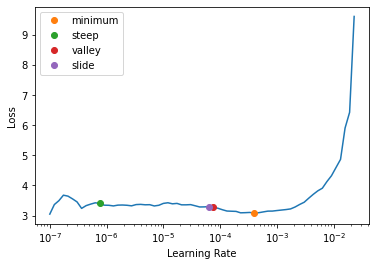

In [45]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [46]:
learn.fit_one_cycle(1, lr_max=4e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,rougeLsum,bertscore_precision,bertscore_recall,bertscore_f1,time
0,2.250701,2.072784,0.381634,0.160370,0.261143,0.357955,0.880187,0.892773,0.886352,04:26


Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

In [49]:
learn.show_results(learner=learn, input_trunc_at=500, target_trunc_at=175)

,text,target,prediction
0,"New York (CNN) -- The mayor of Newark has called for an investigation into a far-reaching New York Police Department surveillance program that was allegedly conducted in the New Jersey city's Muslim's neighborhoods. ""The Newark Police Department was not involved in joint operations with the New York Police Department as was described in the disclosed NYPD report,"" Mayor Cory Booker said Wednesday, referring to a leaked internal New York police document that allegedly detailed police surveillanc","Newark's mayor calls for investigation into New York Police Department surveillance.\nNew Jersey Gov. Chris Christie also calls the development ""disturbing""\nChristie asks stat","[ Newark Mayor Cory Booker calls for investigation into New York Police surveillance program .\nThe program allegedly involved Muslim-owned businesses and mosques .\nNew Jersey Gov. Chris Christie calls the development ""disturbing"" and has asked the state's attorney general to investigate .\nThere was no statement in the document regarding terrorism or criminal activity ., Undercover FTC agents posing as customers found ""significant violations"" in 23 of 102 funeral homes investigated .\nRichmond and Fredericksburg, Virginia had the highest number of funeral homes found with significant violations .\nThe FTC gives funeral homes an opportunity to right their wrongs before they're hauled into court .]"


In [50]:
#Inference

In [51]:
learn.metrics = None
learn = learn.to_fp32()
learn.export(fname="cnn_summary_export.pkl")

In [52]:
test_article = cnn_daily.iloc[11].article
test_article

'(CNN)For the second time during his papacy, Pope Francis has announced a new group of bishops and archbishops set to become cardinals -- and they come from all over the world. Pope Francis said Sunday that he would hold a meeting of cardinals on February 14 "during which I will name 15 new Cardinals who, coming from 13 countries from every continent, manifest the indissoluble links between the Church of Rome and the particular Churches present in the world," according to Vatican Radio. New cardinals are always important because they set the tone in the church and also elect the next pope, CNN Senior Vatican Analyst John L. Allen said. They are sometimes referred to as the princes of the Catholic Church. The new cardinals come from countries such as Ethiopia, New Zealand and Myanmar. "This is a pope who very much wants to reach out to people on the margins, and you clearly see that in this set," Allen said. "You\'re talking about cardinals from typically overlooked places, like Cape Ve

In [53]:
infer = load_learner(fname="cnn_summary_export.pkl")
infer.blurr_summarize(test_article)

[{'summary_texts': " The 15 new cardinals come from countries such as Ethiopia, New Zealand and Myanmar .\nFor the second time since Francis' election, no Americans made the list .\nLast year, Pope Francis appointed 19 cardinals, including bishops from Haiti and Burkina Faso .\nIn addition to the 15 cardinals named on Sunday, five retired archbishops and bishops will also be honored ."}]